## Image Analysis

The idea of this notebook is to look at the optical flow images and
  - Figure out if there are similarities in classes between different video examples. First plot first 3 images (rgb and OF)
  - Another is to look  to see if there is a similarity in sequences can be seen in opt flow only

In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os, os.path
import random

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)

Populating the interactive namespace from numpy and matplotlib


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [133]:
# we'll look at baseball, brushing teeth and haircut class

def plot_n_jpeg_and_of(action_video, n_frames, interval_len, print_debug=0):
    jpeg_path = '/data/jpegs_256/' + action_video
    of_path_u = '/data/tvl1_flow/u/' + action_video
    of_path_v = '/data/tvl1_flow/u/' + action_video
    frame_count =  len([name for name in os.listdir(of_path_u) if name.endswith('.jpg')])
    
    seq_len  = n_frames  * interval_len
    seq_start = random.randint(1, frame_count - seq_len + 1)
    frames = [i for i in range(seq_start,seq_start+seq_len,interval_len)] 
    
    fig=plt.figure(figsize=(10, 10))
    
    i = 1
    for frame in frames:
        u_file = of_path_u + os.sep + 'frame' + f'{frame:06}' + '.jpg'
        v_file = of_path_v + os.sep + 'frame' + f'{frame:06}' + '.jpg'
        jpeg_file = jpeg_path + os.sep + 'frame' + f'{frame:06}' + '.jpg'
        
        if print_debug:
            print('plotting u : ', u_file )
            print('plotting v : ', u_file )
            print('plotting rgb : ', u_file )
        
        u_img = cv2.imread(u_file, 0)
        v_img = cv2.imread(v_file, 0)
        jpeg_img = cv2.imread(jpeg_file)
        fig.add_subplot(3, n_frames, i)
        plt.imshow(u_img)
        fig.add_subplot(3, n_frames, i+1)
        plt.imshow(v_img)
        fig.add_subplot(3, n_frames, i+2)
        plt.imshow(jpeg_img)

        i = i + 3
    plt.show()

plotting u :  /data/tvl1_flow/u/v_BaseballPitch_g01_c02/frame000036.jpg
plotting v :  /data/tvl1_flow/u/v_BaseballPitch_g01_c02/frame000036.jpg
plotting rgb :  /data/tvl1_flow/u/v_BaseballPitch_g01_c02/frame000036.jpg
plotting u :  /data/tvl1_flow/u/v_BaseballPitch_g01_c02/frame000037.jpg
plotting v :  /data/tvl1_flow/u/v_BaseballPitch_g01_c02/frame000037.jpg
plotting rgb :  /data/tvl1_flow/u/v_BaseballPitch_g01_c02/frame000037.jpg
plotting u :  /data/tvl1_flow/u/v_BaseballPitch_g01_c02/frame000038.jpg
plotting v :  /data/tvl1_flow/u/v_BaseballPitch_g01_c02/frame000038.jpg
plotting rgb :  /data/tvl1_flow/u/v_BaseballPitch_g01_c02/frame000038.jpg


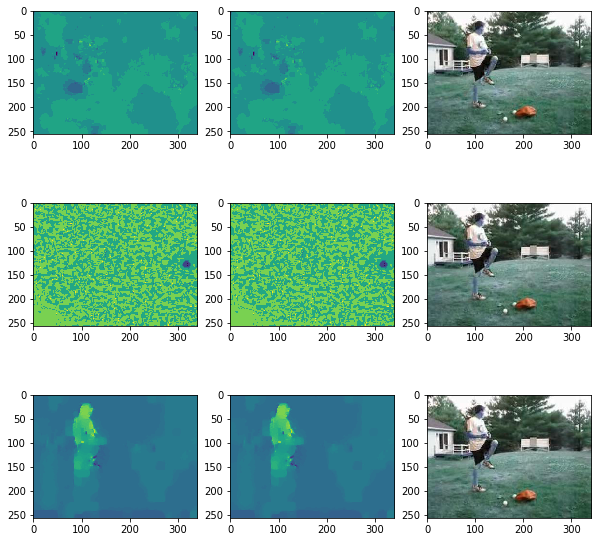

In [77]:
plot_n_jpeg_and_of('v_BaseballPitch_g01_c02',3,1)

In [173]:
u_img = cv2.imread('/data/tvl1_flow/u/v_BaseballPitch_g01_c02/frame000037.jpg', 0)

In [176]:
u_img = u_img - 3*np.std(u_img)

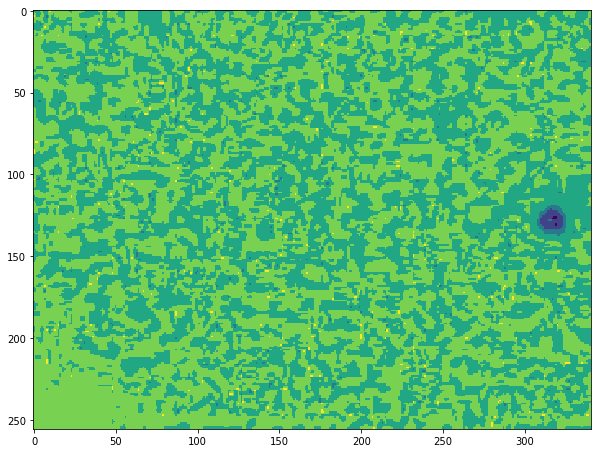

In [177]:
plt.imshow(u_img)

# what the hell is that above?

My best guess is that its what happens  when there very little difference between the two frames used to compute the optical flow. This as far as I can tell would be  garbage. Whats interesting is that the standard deviation for this "no flow" images is noticable less than flow images with significant flow

std:  0.5814062864828737


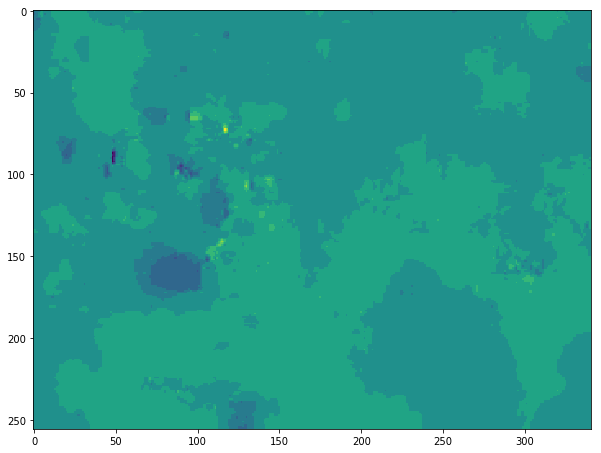

In [78]:
u_img = cv2.imread('/data/tvl1_flow/u/v_BaseballPitch_g01_c02/frame000036.jpg', 0)
print('std: ',np.std(u_img))
plt.imshow(u_img)

The above is a flow image with  intermediate amount of   flow going on compared  to say a full monty flow image like below

std:  4.338578707094727


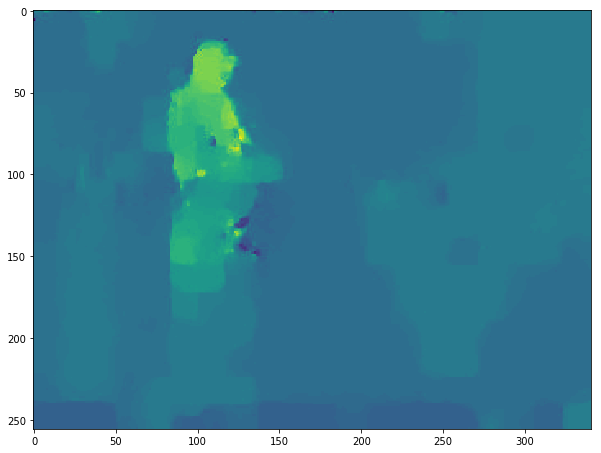

In [79]:
u_img = cv2.imread('/data/tvl1_flow/u/v_BaseballPitch_g01_c02/frame000038.jpg', 0)
print('std: ',np.std(u_img))
plt.imshow(u_img)

# Could this be having an appreciable effect on the classifier?

My guess would be yes, as that can't be giving any information whatsoever. But surely Feichtehofer whom this data is from would have  been affected by this?? Unless he filtered  it out. I thikn two things can be done, see if you can come up with a way to effectively filter out this garbage looking OF images and see if it improves classification. 
 - A good first question, is how much garbage flows are in a typical directory

plotting u :  /data/tvl1_flow/u/v_BaseballPitch_g05_c01/frame000072.jpg
plotting v :  /data/tvl1_flow/u/v_BaseballPitch_g05_c01/frame000072.jpg
plotting rgb :  /data/tvl1_flow/u/v_BaseballPitch_g05_c01/frame000072.jpg
plotting u :  /data/tvl1_flow/u/v_BaseballPitch_g05_c01/frame000073.jpg
plotting v :  /data/tvl1_flow/u/v_BaseballPitch_g05_c01/frame000073.jpg
plotting rgb :  /data/tvl1_flow/u/v_BaseballPitch_g05_c01/frame000073.jpg
plotting u :  /data/tvl1_flow/u/v_BaseballPitch_g05_c01/frame000074.jpg
plotting v :  /data/tvl1_flow/u/v_BaseballPitch_g05_c01/frame000074.jpg
plotting rgb :  /data/tvl1_flow/u/v_BaseballPitch_g05_c01/frame000074.jpg


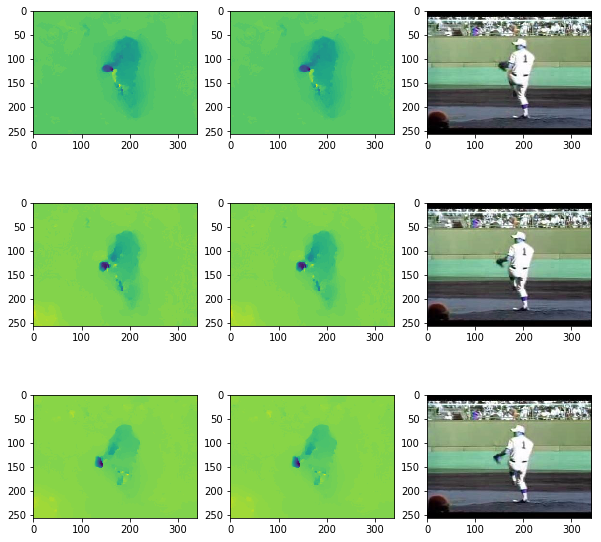

In [86]:
plot_n_jpeg_and_of('v_BaseballPitch_g05_c01',3,1)

plotting u :  /data/tvl1_flow/u/v_BaseballPitch_g09_c01/frame000023.jpg
plotting v :  /data/tvl1_flow/u/v_BaseballPitch_g09_c01/frame000023.jpg
plotting rgb :  /data/tvl1_flow/u/v_BaseballPitch_g09_c01/frame000023.jpg
plotting u :  /data/tvl1_flow/u/v_BaseballPitch_g09_c01/frame000024.jpg
plotting v :  /data/tvl1_flow/u/v_BaseballPitch_g09_c01/frame000024.jpg
plotting rgb :  /data/tvl1_flow/u/v_BaseballPitch_g09_c01/frame000024.jpg
plotting u :  /data/tvl1_flow/u/v_BaseballPitch_g09_c01/frame000025.jpg
plotting v :  /data/tvl1_flow/u/v_BaseballPitch_g09_c01/frame000025.jpg
plotting rgb :  /data/tvl1_flow/u/v_BaseballPitch_g09_c01/frame000025.jpg


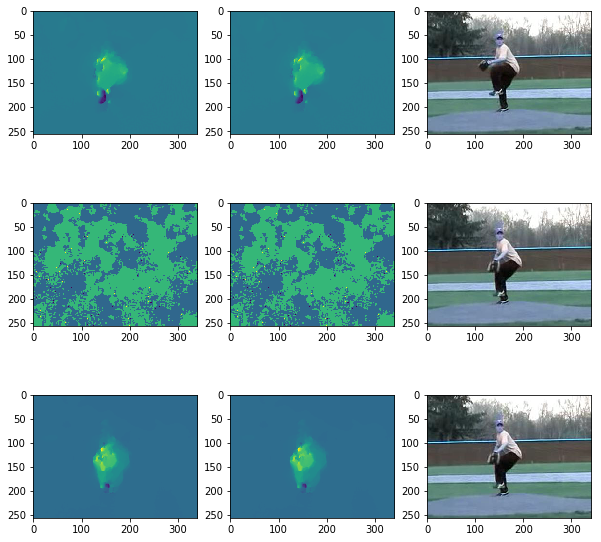

In [88]:
plot_n_jpeg_and_of('v_BaseballPitch_g09_c01',3,1)

In [106]:
def calculate_garbage_flows_in_dir(action_video, threshold_val):
    of_path_u = '/data/tvl1_flow/u/' + action_video
    of_path_v = '/data/tvl1_flow/u/' + action_video
    frames =  [name for name in os.listdir(of_path_u) if name.endswith('.jpg')]
    total_frames = 2*len([name for name in os.listdir(of_path_u) if name.endswith('.jpg')])
    garbage_count = 0
    for frame in frames:
        u_file = of_path_u + os.sep + frame
        v_file = of_path_v + os.sep + frame
        u_img = cv2.imread(u_file, 0)
        v_img = cv2.imread(v_file, 0)
        garbage_count = garbage_count + 1 if np.std(u_img) > threshold_val else 0
        garbage_count = garbage_count + 1 if np.std(v_img) > threshold_val else 0
    print('total frames',  total_frames)
    print('garbage_count',  garbage_count)
    
    return float(garbage_count)/total_frames

In [115]:
print(calculate_garbage_flows_in_dir('v_ApplyEyeMakeup_g02_c01', 0.6) )
print(calculate_garbage_flows_in_dir('v_BaseballPitch_g02_c04', 0.5) )
print(calculate_garbage_flows_in_dir('v_BandMarching_g02_c04', 0.5) )
print(calculate_garbage_flows_in_dir('v_BalanceBeam_g05_c02', 0.5) )


total frames 338
garbage_count 80
0.23668639053254437
total frames 168
garbage_count 64
0.38095238095238093
total frames 242
garbage_count 242
1.0
total frames 226
garbage_count 226
1.0


For baseball 45% of the data in a file is potentially garbage!
But for others its a bit harder to figure out what is garbase using 0.5

# Comparison of frames between instances


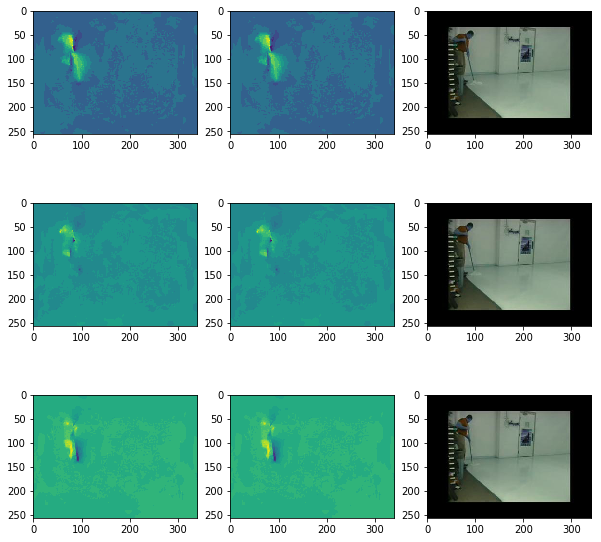

In [139]:
plot_n_jpeg_and_of('v_MoppingFloor_g07_c05',3,5)

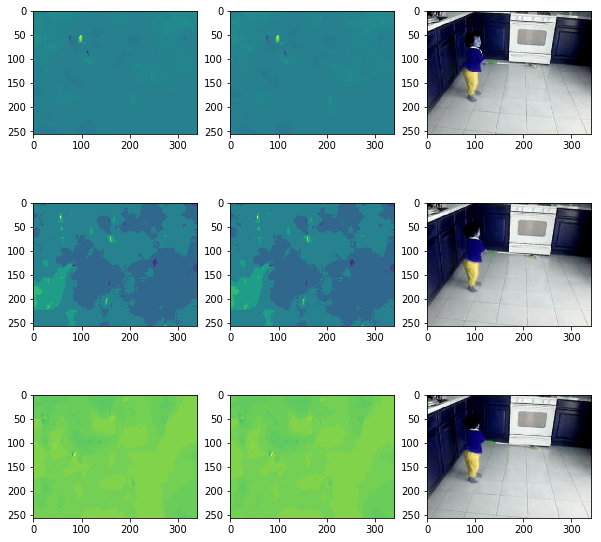

In [140]:
plot_n_jpeg_and_of('v_MoppingFloor_g01_c03',3,5)

plotting u :  /data/tvl1_flow/u/v_MoppingFloor_g02_c03/frame000124.jpg
plotting v :  /data/tvl1_flow/u/v_MoppingFloor_g02_c03/frame000124.jpg
plotting rgb :  /data/tvl1_flow/u/v_MoppingFloor_g02_c03/frame000124.jpg
plotting u :  /data/tvl1_flow/u/v_MoppingFloor_g02_c03/frame000129.jpg
plotting v :  /data/tvl1_flow/u/v_MoppingFloor_g02_c03/frame000129.jpg
plotting rgb :  /data/tvl1_flow/u/v_MoppingFloor_g02_c03/frame000129.jpg
plotting u :  /data/tvl1_flow/u/v_MoppingFloor_g02_c03/frame000134.jpg
plotting v :  /data/tvl1_flow/u/v_MoppingFloor_g02_c03/frame000134.jpg
plotting rgb :  /data/tvl1_flow/u/v_MoppingFloor_g02_c03/frame000134.jpg


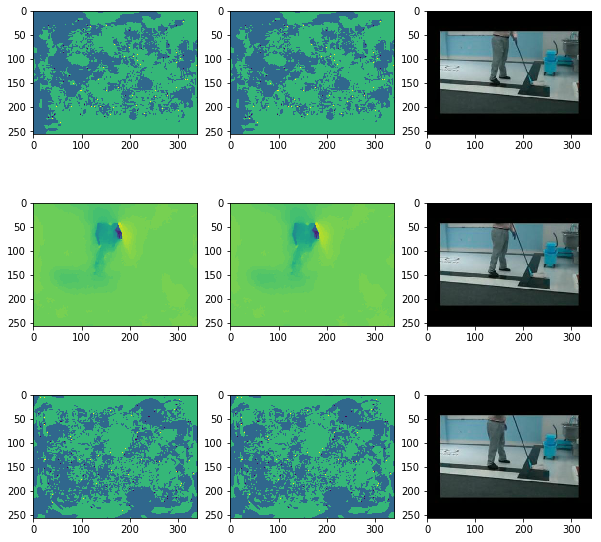

In [178]:
plot_n_jpeg_and_of('v_MoppingFloor_g02_c03',3,5, print_debug=1)

std:  2.8807456738010764


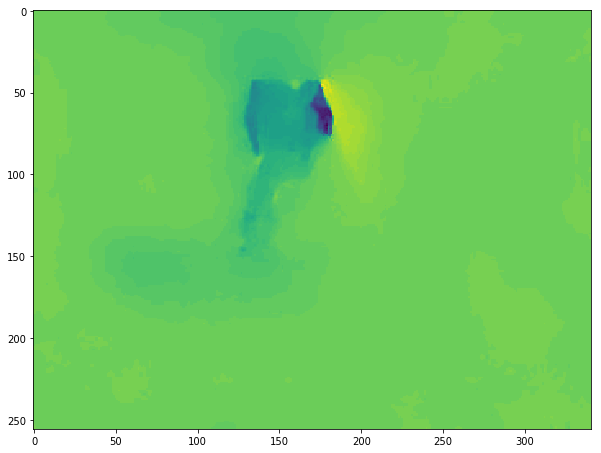

In [181]:
u_img = cv2.imread('/data/tvl1_flow/u/v_MoppingFloor_g02_c03/frame000129.jpg', 0)
print('std: ',np.std(u_img))
plt.imshow(u_img)

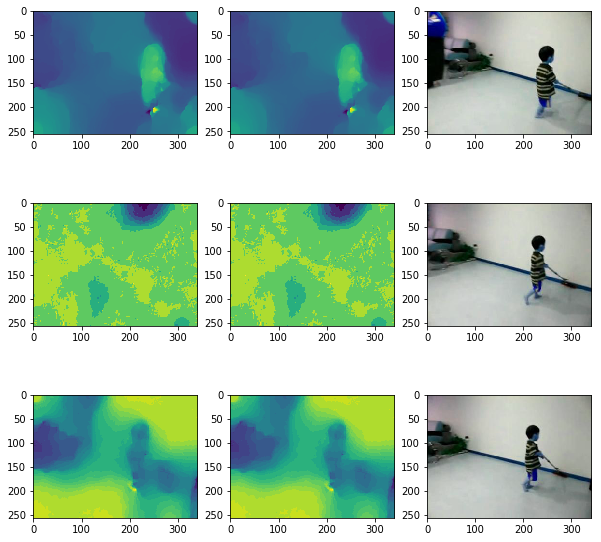

In [144]:
plot_n_jpeg_and_of('v_MoppingFloor_g03_c03',3,5, print_debug=0)

Looking at the confusion matrix I did well with basketball, lets see if its obvious why I did well

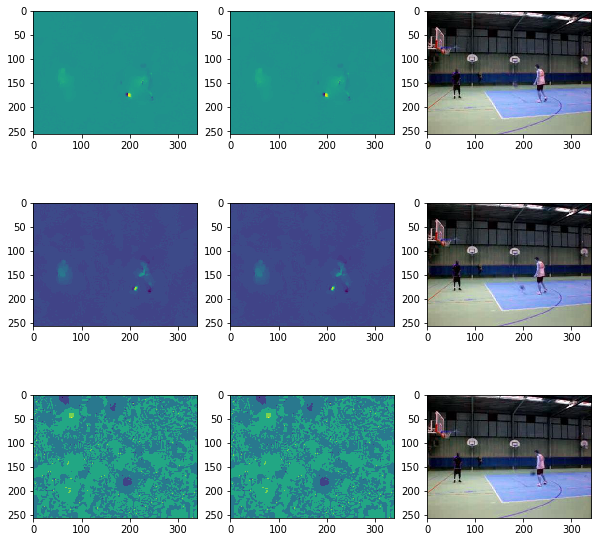

In [158]:
plot_n_jpeg_and_of('v_Basketball_g01_c04',3,3, print_debug=0)

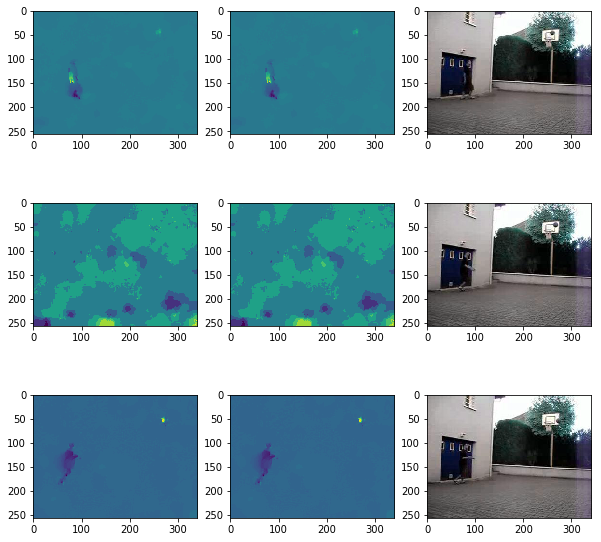

In [147]:
plot_n_jpeg_and_of('v_Basketball_g03_c06',3,5, print_debug=0)

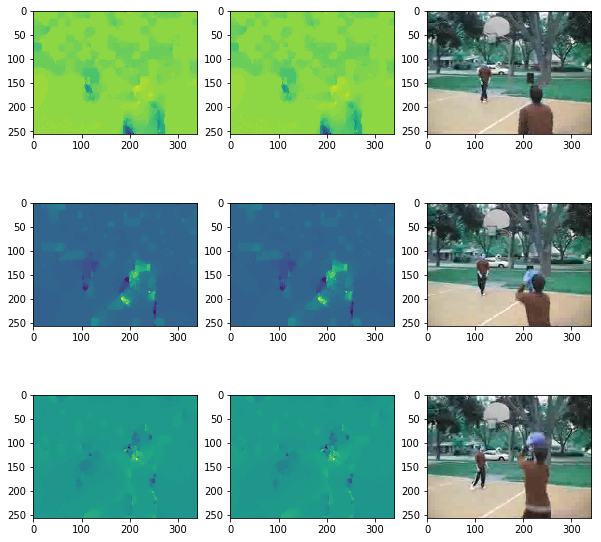

In [148]:
plot_n_jpeg_and_of('v_Basketball_g07_c04',3,5, print_debug=0)

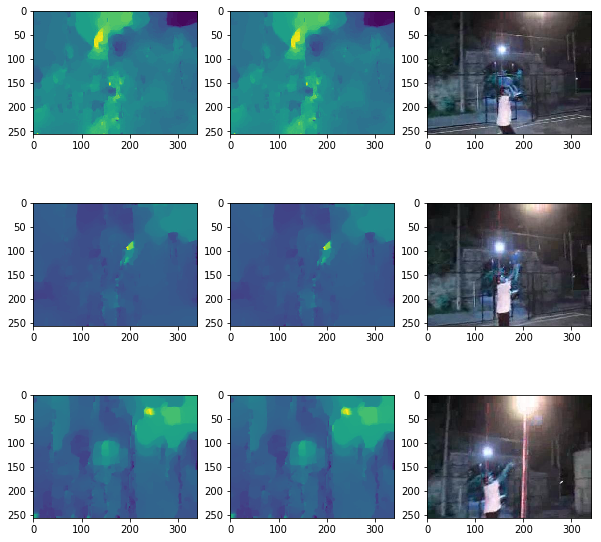

In [151]:
plot_n_jpeg_and_of('v_Basketball_g06_c04',3,5, print_debug=0)

I believe the ball in the frame plays a significant part in why the frame  can be predicted

It helps when the temporal cues are well known shapes you see in reality. But only so much.

# Recreating garbage 

In [191]:
prvs = cv2.imread('/data/jpegs_256/v_MoppingFloor_g02_c03/frame000124.jpg', 0)
next = cv2.imread('/data/jpegs_256/v_MoppingFloor_g02_c03/frame000125.jpg', 0)

hsv = np.zeros((256,342))
hsv[...,1] = 255
flow = cv2.DualTVL1OpticalFlow(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
flow.shape

SystemError: new style getargs format but argument is not a tuple

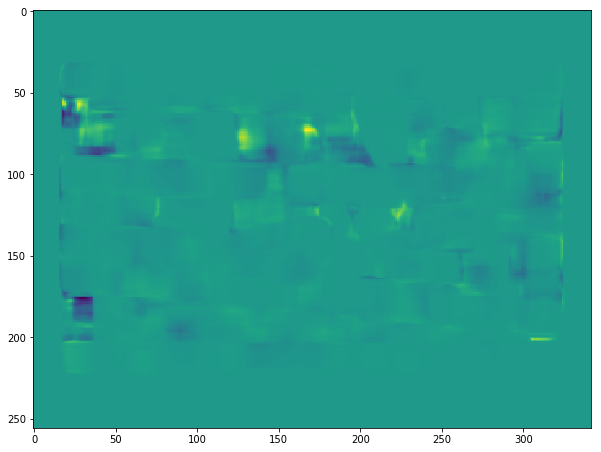

In [189]:
plt.imshow(flow[:,:,1])

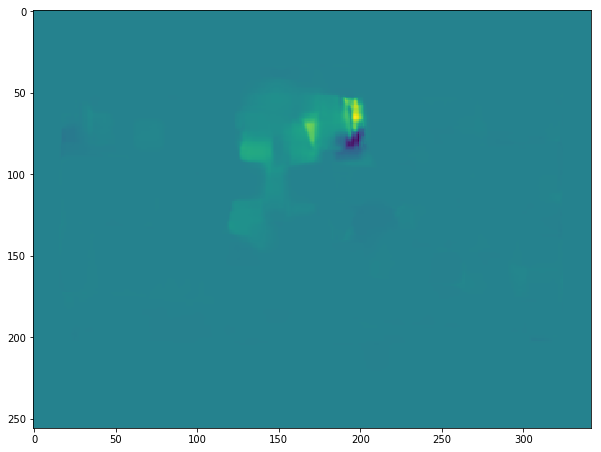

In [190]:
prvs = cv2.imread('/data/jpegs_256/v_MoppingFloor_g02_c03/frame000129.jpg', 0)
next = cv2.imread('/data/jpegs_256/v_MoppingFloor_g02_c03/frame000130.jpg', 0)

hsv = np.zeros((256,342))
hsv[...,1] = 255
flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
plt.imshow(flow[:,:,1])

In [220]:
flow = cv2.DualTVL1OpticalFlow_create(innnerIterations=1)

In [221]:
prvs = cv2.imread('/data/jpegs_256/v_MoppingFloor_g02_c03/frame000124.jpg', 0)
next = cv2.imread('/data/jpegs_256/v_MoppingFloor_g02_c03/frame000125.jpg', 0)
p = None
p = flow.calc(prvs, next, p)

In [222]:
p.shape

(256, 342, 2)

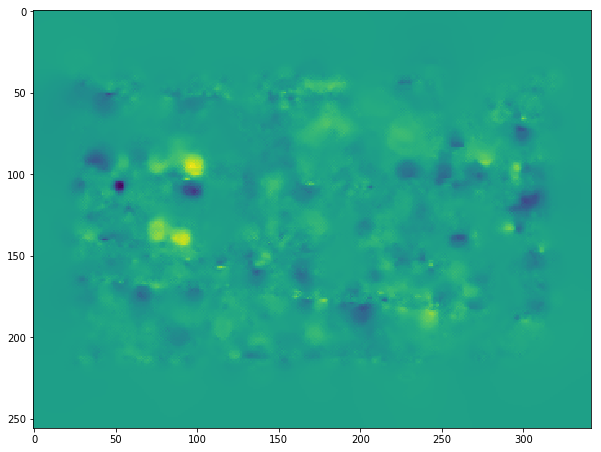

In [223]:
plt.imshow(p[:,:,1])